# L1 and L2 Regularization

Overfitting is a very common issue in the field of ML and L1 and L2 Regularization are some of the techniques that can be used to address the overfitting issue.

Today, We will be using house price dataset and first we will build a model using simple Linear Regression and will see if its overfitting the model and then will use L1 and L2 Regularization and will see how we address the overfitting issue and how it improve the score on our test set

Lets say u are trying to predict number of matches won based on the age, ususally when a sport person get older, the number of matches won kind of get reduced, so we can have this kind of distribution where to buiild a model u can create a simple linear regression model and the equation might look like this
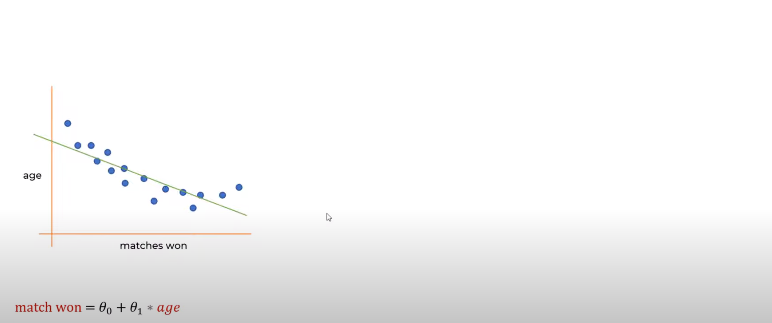
theta 0 and theta 1 are just a constant, as u can see above, u can see that the line is not really accurately  describing all the data points, it is trying to fit a best fit line but u can see some data points are going away and if u have some further data points then this isnt a very accurate representation of our data dustribution.

Then u can build a distribution which might look like below
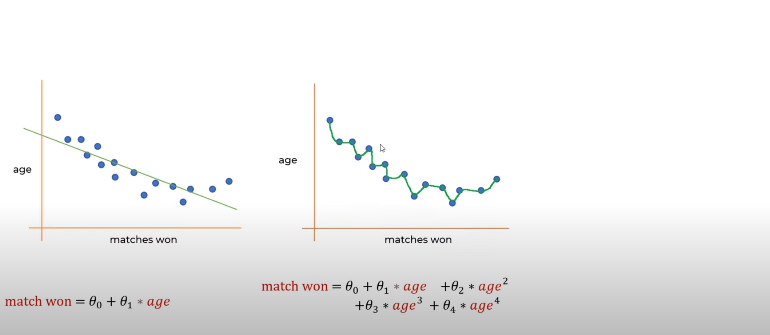
So here we are trying to draw a line which kind of exactly passed through all the data points and in that case our equation might look like that in above diagram, so its a higher order polynomial equation where u are tyring to findout the matches won based on the age of a person, but here the issue is, this equation is really complex, the line is zigzag, it is basically overfitting.

But what might be better is if you have a line like the 3rd diagram below
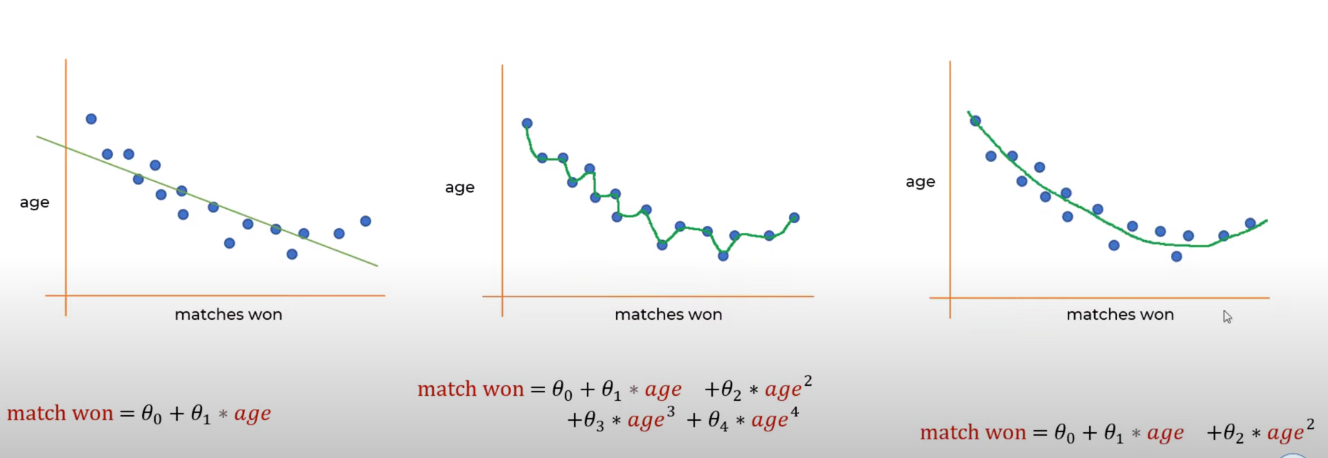
So that is the balance between the first two diagrams, the line will look like a curve and it can generralize ur data really well.

So the first case is called **Underfit** the second case is called **Overfit** and the third is **Balanced fit** 
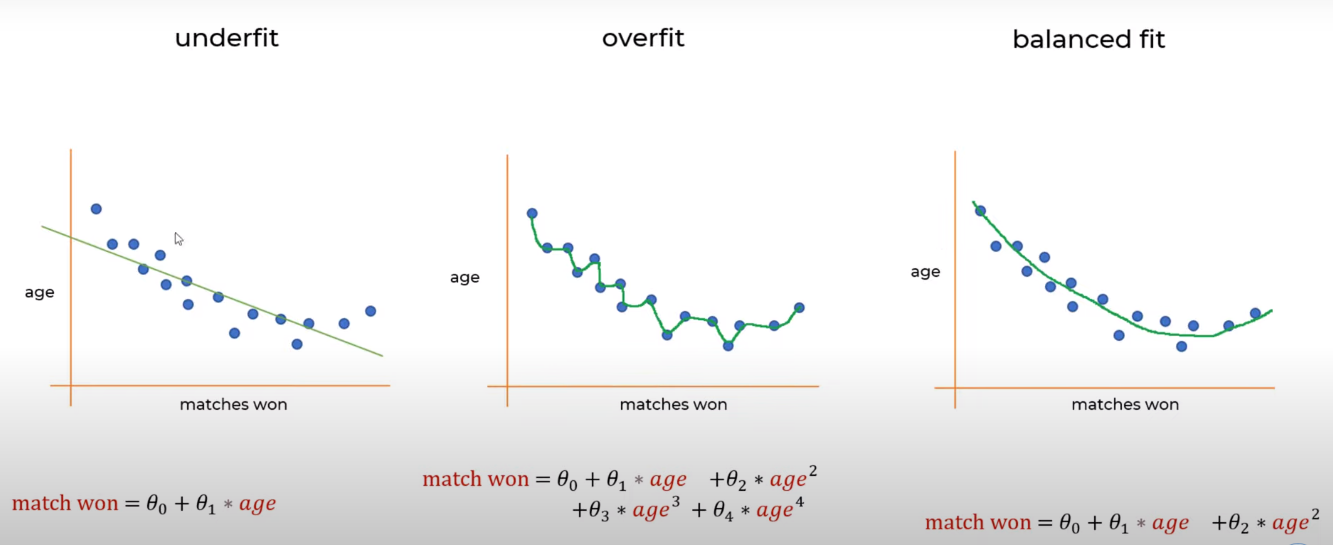

Now, how do u reduce overfitting? so here below is our overfitting line along with the equation
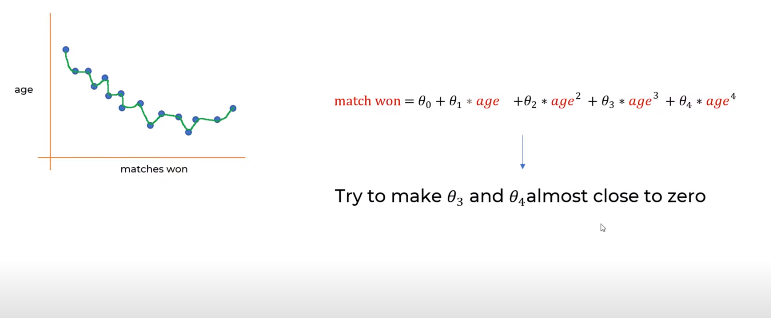
and if this equation we someone make sure that our theta 0 and theta 4 is almost close to 0 then we will get a equation like this
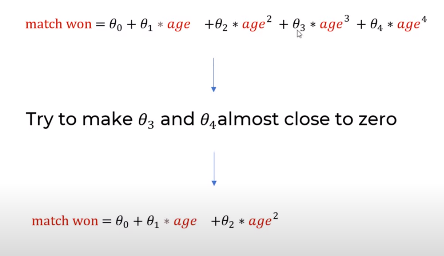
So the idea here is to shrink ur parameters which is theta 0, theta 2, theta 4 or theta 1, if u can reduce these parameters then u can get a better equation for ur predicteion
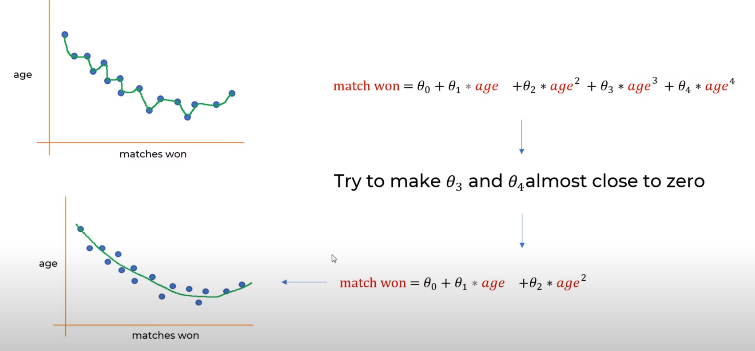

Now, how do we shrink it? earlier we saw that we can calculate **Mean squared error**, so when we run training we pass first sample and then we calculate the y predicted then compare it with the truth value and this is how we get the **MSE**
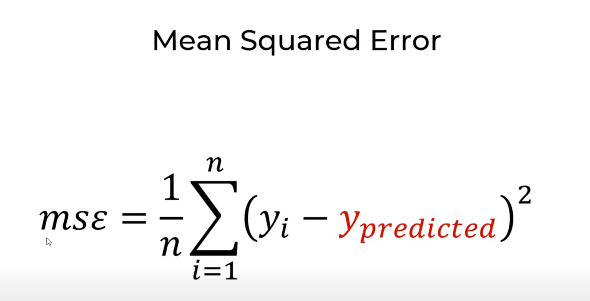
Here y predicted is actually htheta(xi) where h theta(xi) could be higher order polynomial equation like below
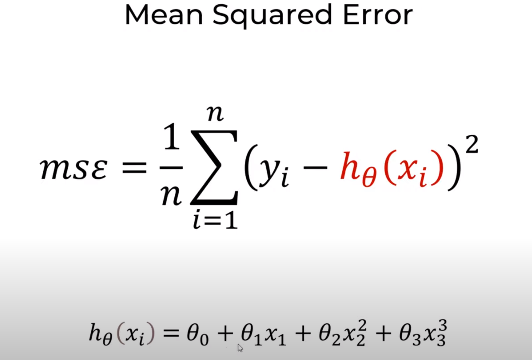
X1, X2 is nothing but ur features, for example the age of the person  or if u are thinking of housing price prediction then it will be the size of the houses.

Now just think that in ur MSE we use during trining and we want to minimize the value of this error on each iteration, so in this equation what if we add this particular paramter highlighted in red
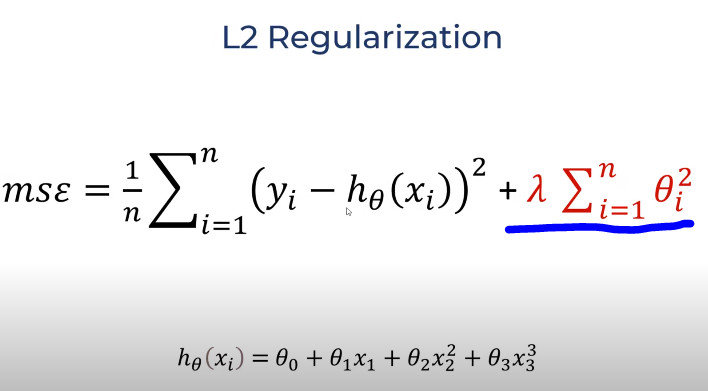
So what is this? so there is this lambda which is a free parameter u can control it and u are making a sqaure of each of these theta parameters , so now if ur theta gets bigger, the error wil be big and ur modelw ill not converge so essentially what ur doing is ur penelizing hiher values of theta here.
So whenever model tries to make the theta value higher, u are adding a penalty here, so by adding this penalty, u are making sure ur theta value doesnt go too high so they will remain very small and u can fine tune this using this parameter lambda here, and if u make this bigger, the theta valyue will get smaller and smaler and if u get this than the theta value can be bigger, So this is called **L2 Regularization**. it is called L2 cuz we are using a sqaure and in **L1 Reguarization** we are using the absulote value
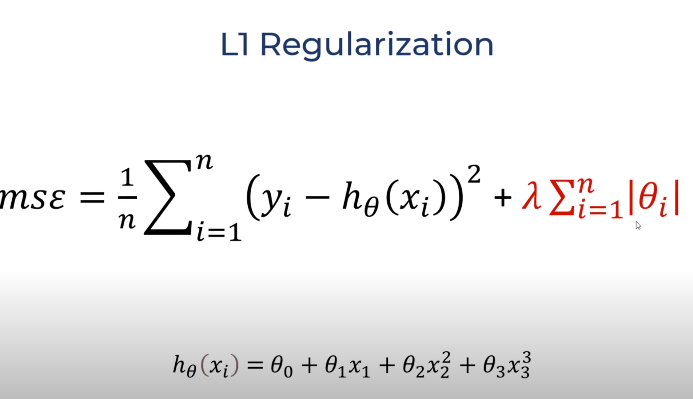
So that is the only difference between L1 and L2.

# Coding Part

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
data = pd.read_csv('Melbourne_housing_FULL.csv')
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


### Checking how many unique values

In [41]:
data.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [42]:
data.shape

(34857, 21)

# Selecting necessary columns
 let's use limited columns so and discard the column we dont want to use and only use below selected columns

In [43]:
cols_to_use = ['Suburb', 'Rooms', 'Type', 'Method', 'SellerG', 'Regionname', 'Propertycount', 
               'Distance', 'CouncilArea', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'Price']
data = data[cols_to_use]

data.head()

,Suburb,Rooms,Type,Method,SellerG,Regionname,Propertycount,Distance,CouncilArea,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price
0,Abbotsford,2,h,SS,Jellis,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,126.0,NaN,NaN
1,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,202.0,NaN,1480000.0
2,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,0.0,156.0,79.0,1035000.0
3,Abbotsford,3,u,VB,Rounds,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,1.0,0.0,NaN,NaN
4,Abbotsford,3,h,SP,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,0.0,134.0,150.0,1465000.0


In [44]:
data.shape

(34857, 15)

### Check NA Values
We will check sum of NA Values and we can see that there are 8217 NA values in Bedroom2 column, etc

In [47]:
data.isna().sum()

Suburb               0
Rooms                0
Type                 0
Method               0
SellerG              0
Regionname           3
Propertycount        3
Distance             1
CouncilArea          3
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
Price             7610
dtype: int64

### Filling NA Values

Now lets fill some of above columns which has NA values with 0, we will only fill below selected columns with 0, cuz for example if the clumn **Car** has 0 value means there is no parking place available in that property, etc

In [48]:
# Some feature's missing values can be treated as zero (another class for NA values or absence of that feature)
# like 0 for Propertycount, Bedroom2 will refer to other class of NA values
# like 0 for Car feature will mean that there's no car parking feature with house
cols_to_fill_zero = ['Propertycount', 'Distance', 'Bedroom2', 'Bathroom', 'Car']
data[cols_to_fill_zero] = data[cols_to_fill_zero].fillna(0) # filling them with 0

In [49]:
data.isna().sum()

Suburb               0
Rooms                0
Type                 0
Method               0
SellerG              0
Regionname           3
Propertycount        0
Distance             0
CouncilArea          3
Bedroom2             0
Bathroom             0
Car                  0
Landsize         11810
BuildingArea     21115
Price             7610
dtype: int64

As u can see above, those columns now has 0 NA values since we filled them with 0's, now lets handle the remaining **Landsize, BuildingArea** and **Price** column as well

### Filling NA with mean values
Now, for the **Landsize** and **BuildingArea** we will fill it with the mean values as below

In [52]:
# other continuous features can be imputed with mean for faster results since our focus is on Reducing overfitting
data['Landsize'] = data['Landsize'].fillna(data.Landsize.mean())
data['BuildingArea'] = data['BuildingArea'].fillna(data.BuildingArea.mean())

In [53]:
data.isna().sum()

Suburb              0
Rooms               0
Type                0
Method              0
SellerG             0
Regionname          3
Propertycount       0
Distance            0
CouncilArea         3
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
Price            7610
dtype: int64

Now, all the columns has 0 NA values except **Price** and some other with has like 3 NA values which doesnt matter since its only 3 compared to our huge dataset so we can just drop all the NA values and we can just drop the NA values in **Price** column as well cuz if it has no price it basically means its not for sale or already sold out or just not available

In [57]:
data.dropna(inplace=True)

In [58]:
data.isna().sum()

Suburb           0
Rooms            0
Type             0
Method           0
SellerG          0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
Price            0
dtype: int64

In [59]:
data.shape

(27244, 15)

As we can see above, now we have no NA values in any column, we have done our data cleaning

## Dummy Variable
Now, we also have some Categorical columns which are text so we will want to convert it into dummies or one hot encoding, we will simply use pandas api called **get_dummies()** 

In [64]:
data = pd.get_dummies(data, drop_first=True).astype(int)
data.head()

,Rooms,Propertycount,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price,Suburb_Aberfeldie,...,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
1,2,4019,2,2,1,1,202,160,1480000,0,...,0,0,0,0,0,0,0,0,1,0
2,2,4019,2,2,1,0,156,79,1035000,0,...,0,0,0,0,0,0,0,0,1,0
4,3,4019,2,3,2,0,134,150,1465000,0,...,0,0,0,0,0,0,0,0,1,0
5,3,4019,2,3,2,1,94,160,850000,0,...,0,0,0,0,0,0,0,0,1,0
6,4,4019,2,3,1,2,120,142,1600000,0,...,0,0,0,0,0,0,0,0,1,0


As u can see above we used dummy variable and converted all the text columns into text and u can also see it created seperated column for each of the CouncilArea

# X and y Splitting

In [68]:
X = data.drop('Price', axis=1)
y = data['Price']

# Train Test Splitting

In [69]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=2)

Since we have splitted our datasets, 
Now, lets do a model training using Regular Linear Regression

In [70]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_X, train_y)

Now lets check the score of the **Linear Regression**

In [71]:
reg.score(test_X, test_y)

0.13413168587513746

As we can see above, our score is really really low but if we check the score on our training dataset it is pretty better than the one above

In [72]:
reg.score(train_X, train_y)

0.6825862950046448

So this Linear Regression is clearly overfitting the dataset since it gives a good score with training dataset but for testing dataset which it hasnt seen before it gave a terrible score, 

# Lasso Regression (L1)
So how do we address this? SKLearn provides a model called **LASSO**, which is basically **L1 Regularization**, so lets try Lasso Regression model this time

In [73]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=50, max_iter=100, tol=0.1)
lasso_reg.fit(train_X, train_y)

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.323e+15, tolerance: 7.963e+14
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=50, max_iter=100, tol=0.1)

You can play around and tweak the parameters above in Lasso Regression and see what gives u the best performance, now lets check the score of the Lasso Regression

In [74]:
lasso_reg.score(test_X, test_y)

0.6633169721521481

Now u can see the accuracy improved, using Normal Linear Regression we got only around 13% and now with Regularization we got 66% so we can see how much of a big diffeence it can make

# Ridge Regression (L2)
There is L2 Regularization as well which we cann **Ridge Regression** so we can try that too

In [75]:
from sklearn.linear_model import Ridge
ridge_reg= Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(train_X, train_y)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [76]:
ridge_reg.score(test_X, test_y)

0.6669747759118699

As u can see above its pretty good as well, ofcourse its still abit low but its better than 13% accuracy which we got earlier.

We see that Lasso and Ridge Regularizations prove to be beneficial when our Simple Linear Regression Model overfits. These results may not be that contrast but significant in most cases.Also that L1 & L2 Regularizations are used in Neural Networks too